# Terrain shaping

> Good video: https://youtu.be/CSa5O6knuwI

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

MIN_X, MAX_X = -40, 40
MIN_Y, MAX_Y = -40, 40
N_SAMPLES = 100

In [2]:
def plot_terrain(terrain_z, sea_level=100):
    # figure setup
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    
    # init grid
    x = np.linspace(MIN_X, MAX_X, N_SAMPLES)
    y = np.linspace(MIN_Y, MAX_Y, N_SAMPLES)
    X, Y = np.meshgrid(x, y)
        
    # plot terrain
    Z = terrain_z(X, Y)
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    
    # plot sea
    Z_sea = 0 * X + sea_level
    ax.plot_surface(X, Y, Z_sea, alpha=0.4, color='blue')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title('Landscape')
    plt.show()

## Surface and sea

#### Pure noise

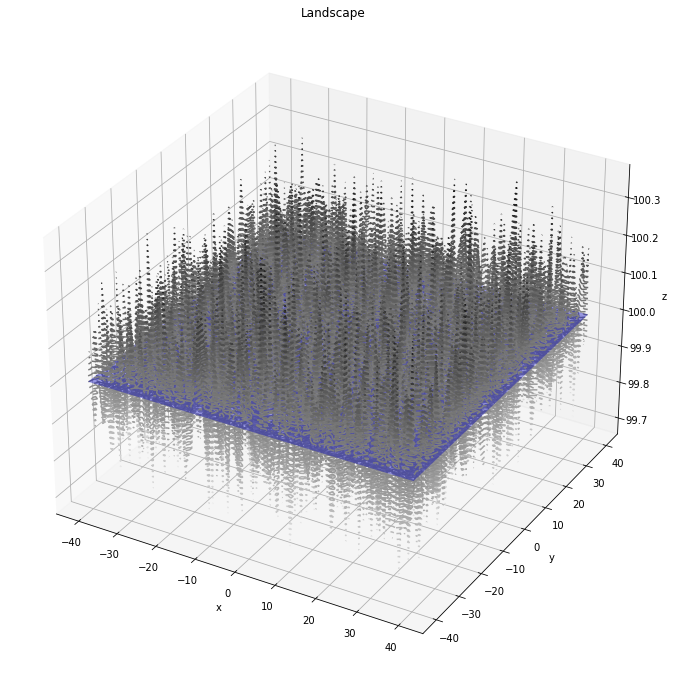

In [5]:
def pure_noise(x, y, freq=0.2, amp=10, altitude=100, noise=0.1):
    return altitude + noise*np.random.randn(*x.shape)

plot_terrain(pure_noise)

#### Single sine

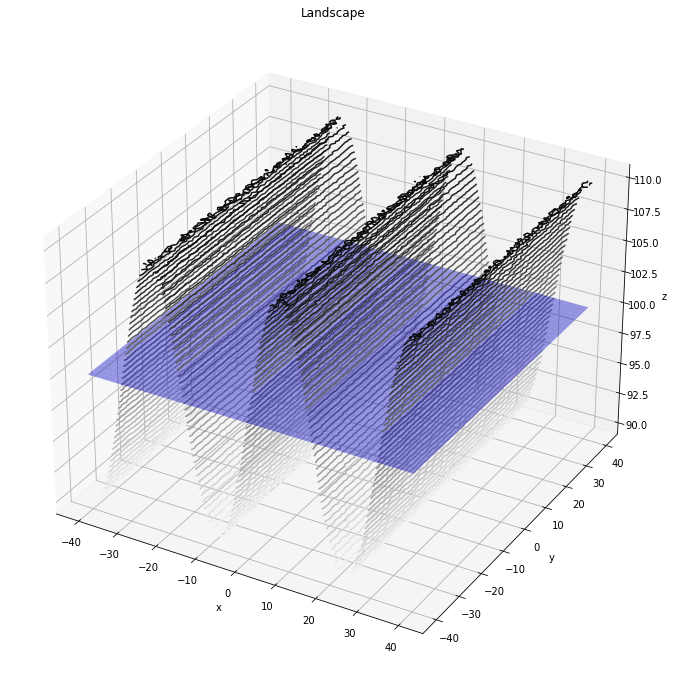

In [6]:
def single_sine(x, y, freq=0.2, amp=10, altitude=100, noise=0.2):
    return altitude + np.sin(x * freq) * amp + noise*np.random.randn(*x.shape)

plot_terrain(single_sine)

#### Double sine

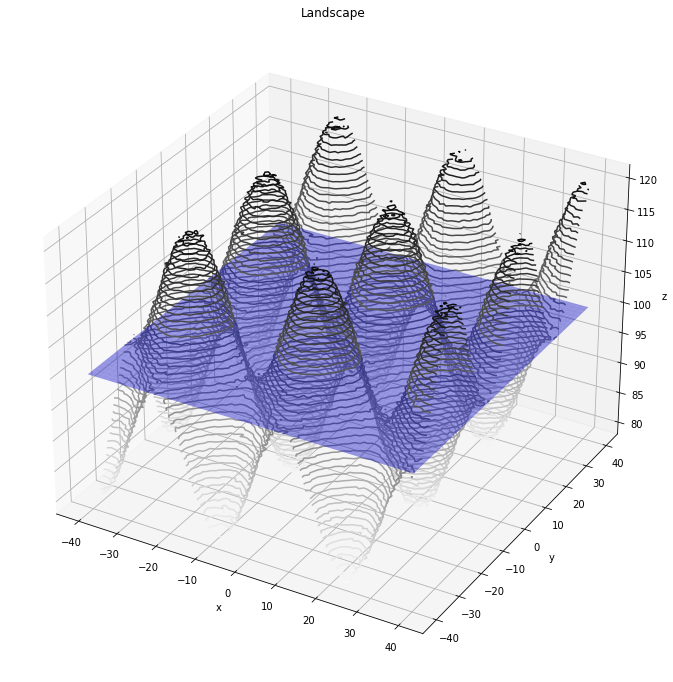

In [7]:
def double_sine(x, y, freq=0.2, amp=10, altitude=100, noise=0.5):
    x_offset = np.sin(x * freq) * amp
    y_offset = np.sin(y * freq) * amp
    surface_z = altitude + x_offset + y_offset
    return surface_z + noise*np.random.randn(*x.shape)

plot_terrain(double_sine)

### Perlin noise

In [8]:
from perlin_noise import PerlinNoise

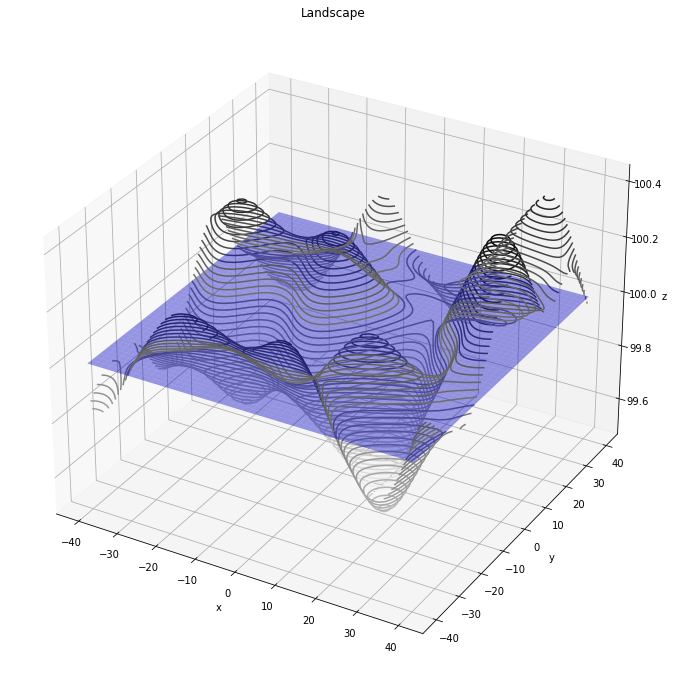

In [9]:
def perlin(X, Y, octaves=4, seed=1, amp=1, altitude=100):
    rec = 0.01
    noise = PerlinNoise(octaves=octaves, seed=seed)
    cs = np.reshape([X,Y],(2,-1)).T
    perlin_z = altitude + amp * np.array([noise([rec*x, rec*y]) for x,y in np.reshape([X,Y],(2,-1)).T]).reshape(X.shape)
    return perlin_z

plot_terrain(perlin)